# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, \
confusion_matrix, roc_curve
import warnings

sns.set()
warnings.filterwarnings('ignore')

# Load the Dataset

In [ ]:
# Load the dataset
df = pd.read_csv('data/Diabetes.csv')

print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis (EDA)

## Data Types and missing values

In [9]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Target Variale Distribution (Outcome)

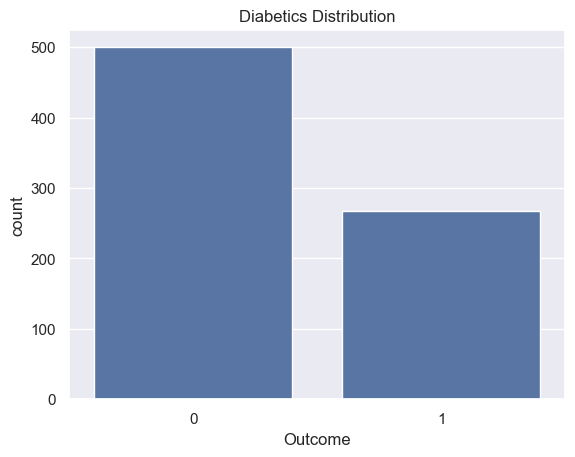

Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


In [12]:
sns.countplot(data=df, x='Outcome')
plt.title('Diabetics Distribution')
plt.show()

# Percentage of Diabetics (1-> Diabetes, 0-> No Diabetes)
print(df['Outcome'].value_counts(normalize=True)*100)

## Numeric Feature Analysis

In [15]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Correlation Analysis

### Pair plots

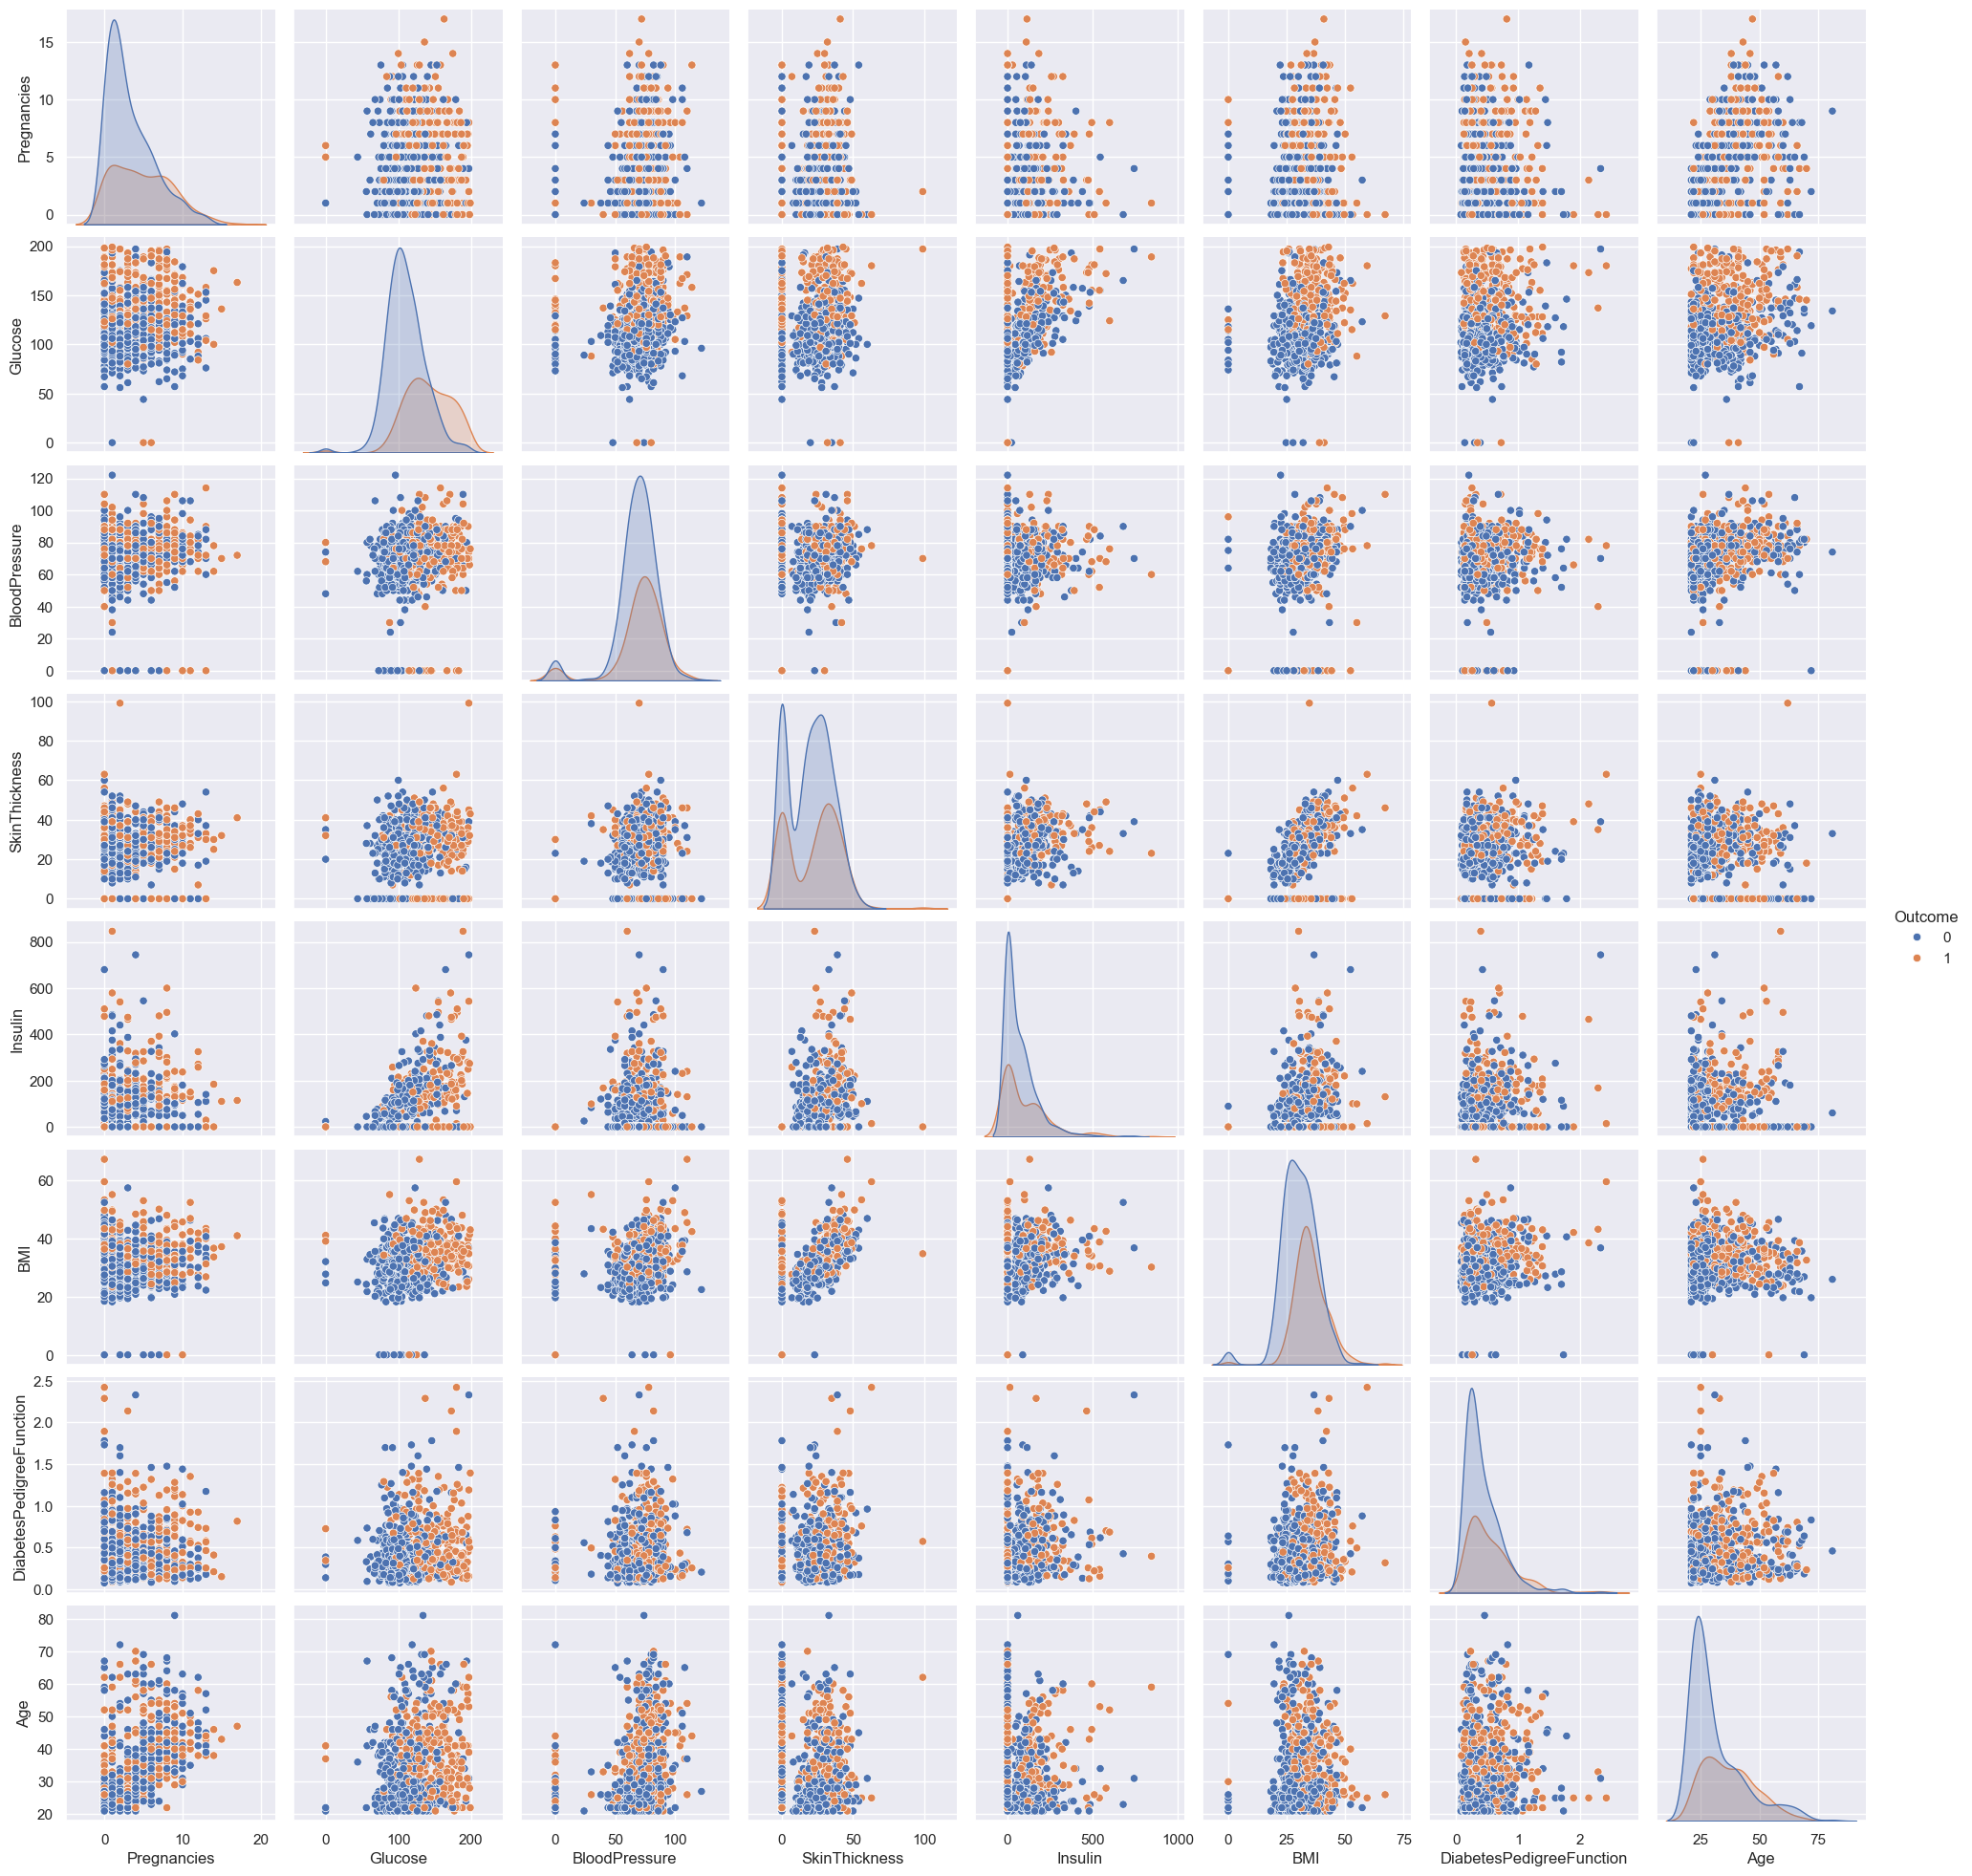

In [19]:
sns.pairplot(df, hue='Outcome')
plt.savefig("pair_plots.png", dpi=300, bbox_inches='tight')
plt.show()

### Correlation Heatmap

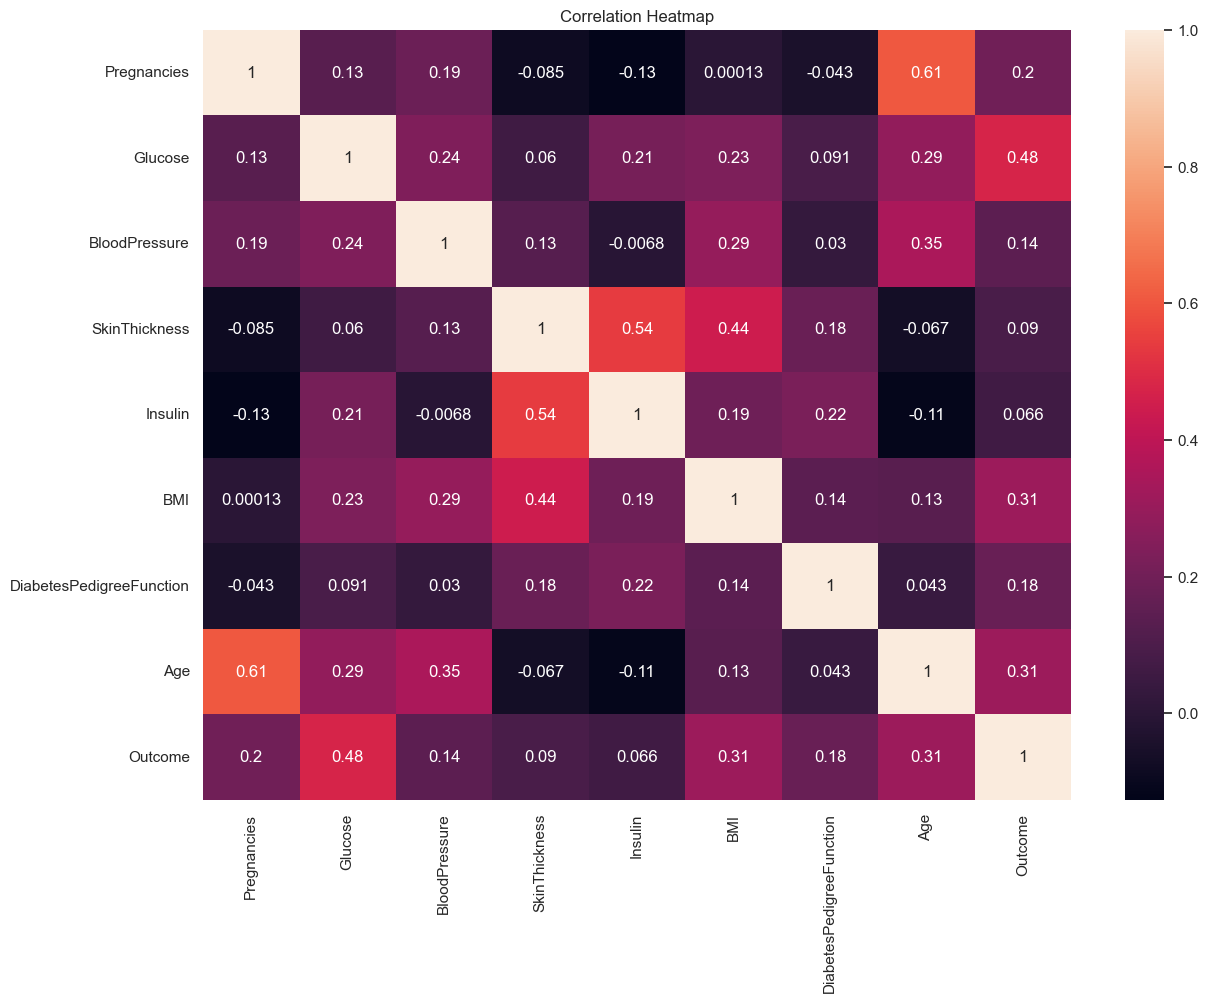

In [22]:
plt.figure(figsize=(14,10))
corr_matrix = df.corr(method='spearman')

sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

In [23]:
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.475776
BMI                         0.309707
Age                         0.309040
Pregnancies                 0.198689
DiabetesPedigreeFunction    0.175353
BloodPressure               0.142921
SkinThickness               0.089728
Insulin                     0.066472
Name: Outcome, dtype: float64

## Analyze Important Features vs Outcome
Individual important features behave with respect to Outcome.

### Histograms

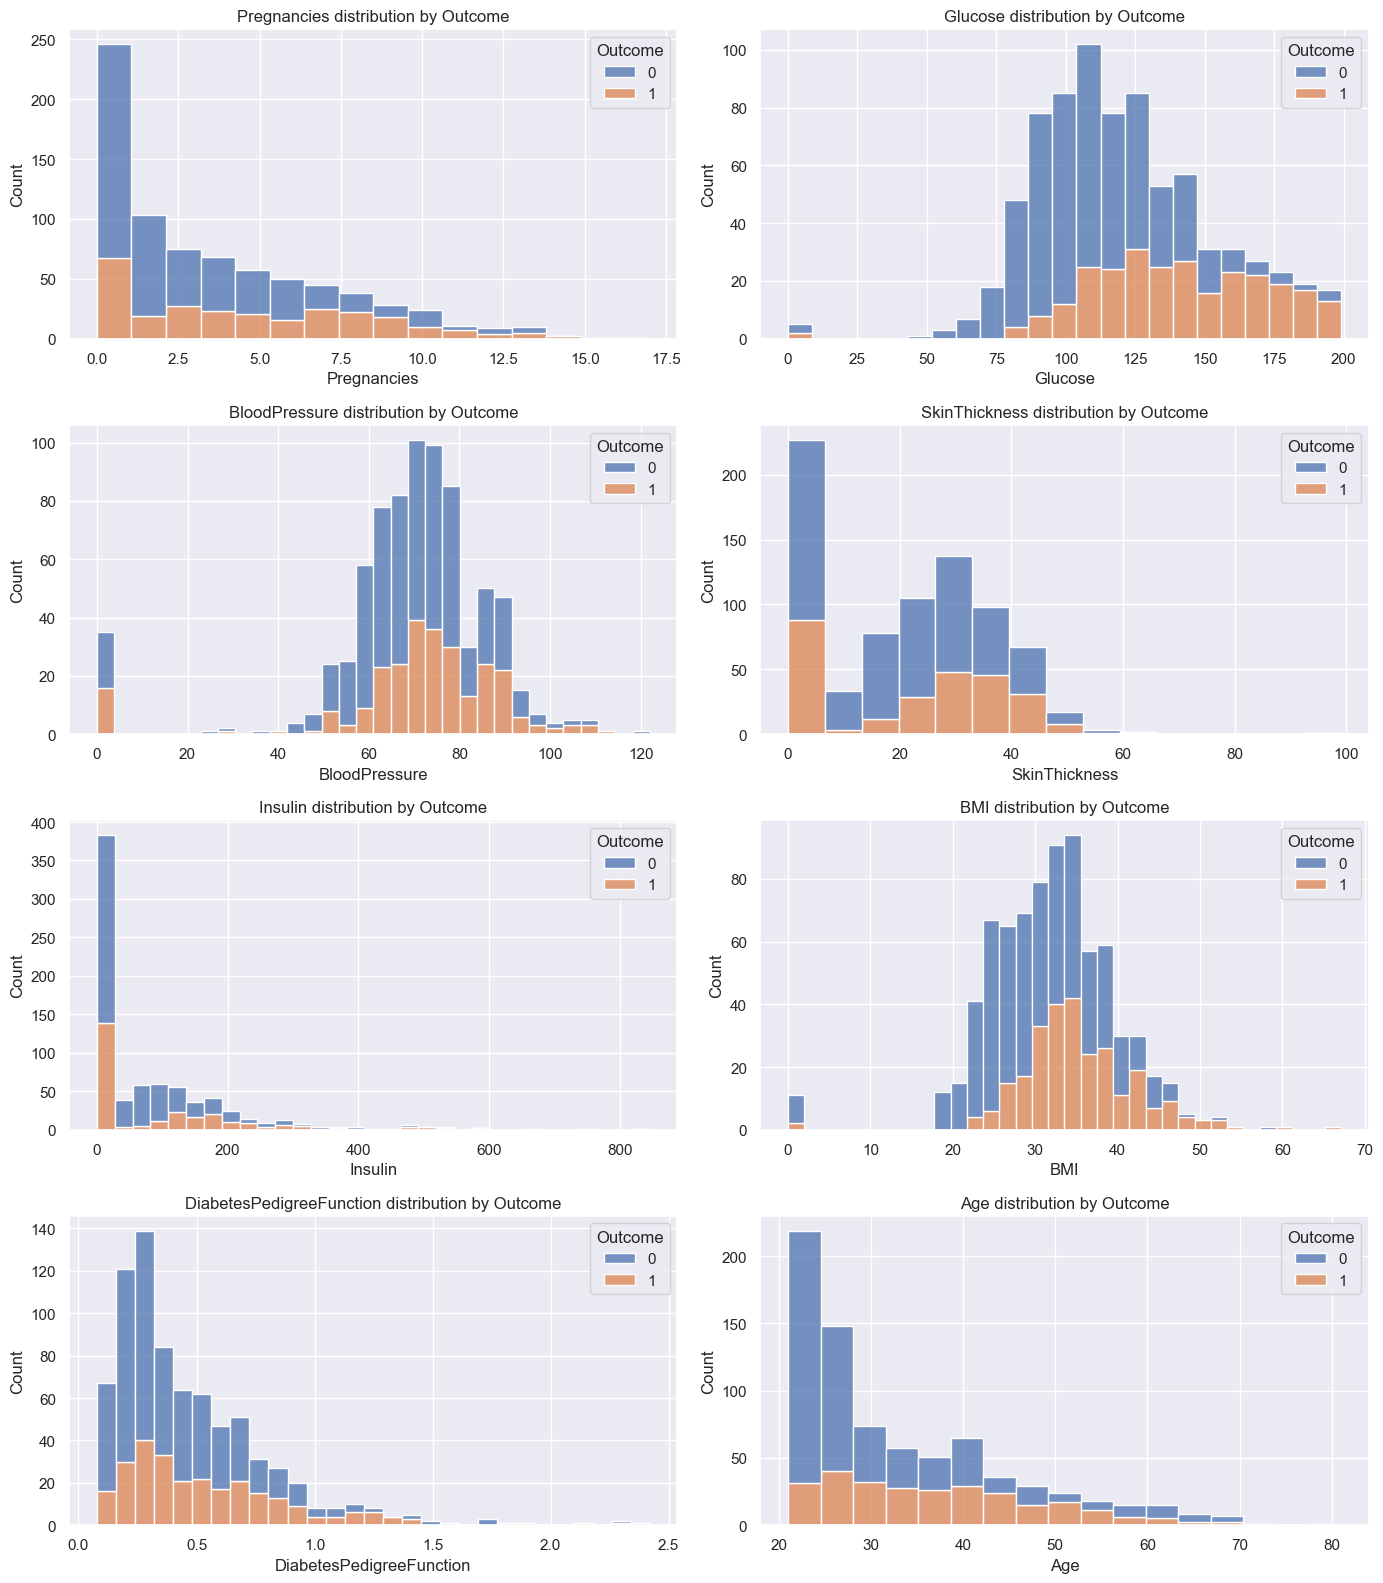

In [28]:
features = df.columns[:-1]

rows, cols = 4, 2
fig, axes = plt.subplots(rows, cols, figsize=(14, 16))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(data=df, hue='Outcome', x=feature,  multiple='stack', ax=axes[i])
    axes[i].set_title(f'{feature} distribution by Outcome')

plt.tight_layout()
plt.savefig("feature_analysis.png", dpi=300, bbox_inches='tight')
plt.show()

### Boxplots

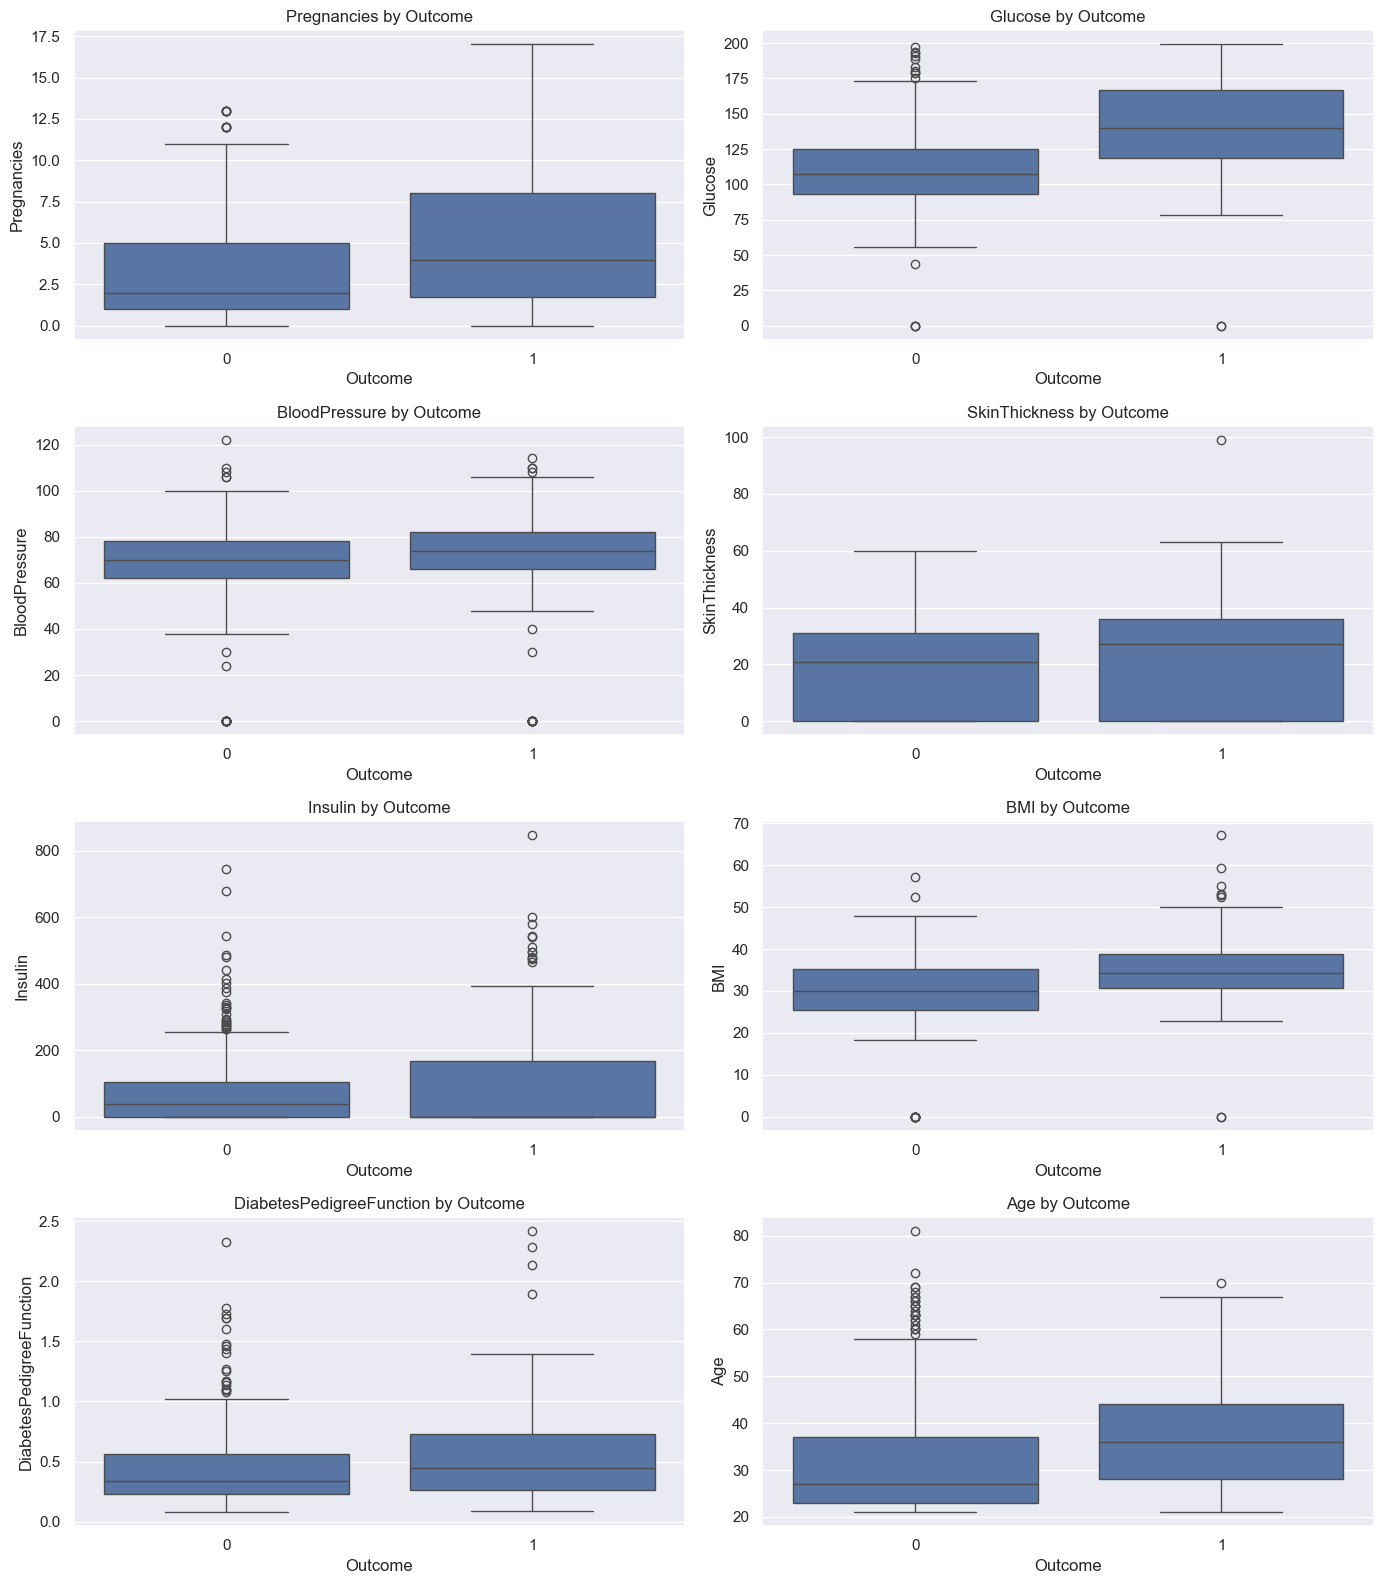

In [31]:
rows, cols = 4, 2
fig, axes = plt.subplots(rows, cols, figsize=(14, 16))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(data=df, x='Outcome', y=feature, ax=axes[i])
    axes[i].set_title(f'{feature} by Outcome')

plt.tight_layout()
plt.savefig("feature_analysis_boxplot.png", dpi=300, bbox_inches='tight')
plt.show()

### Missing/Anomalous Values
0 entries in features like Glucose, BloodPressure, SkinThickness, Insulin and BMI are clinically impossible. For example, a blood pressure of 0 or blood glucose of 0 cannot occur. These zeros are thus treated as missing values.

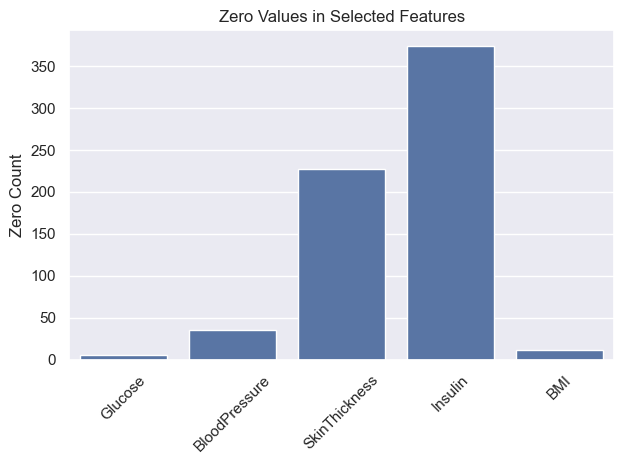


Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11


In [34]:
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Count how many zeros in each feature
zero_counts = [df[feature][df[feature] == 0].count() for feature in features]

# Create barplot
sns.barplot(x=features, y=zero_counts)
plt.ylabel('Zero Count')
plt.title('Zero Values in Selected Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("zero_values.png", dpi=300, bbox_inches='tight')
plt.show()

print()
for f, c in zip(features, zero_counts):
    print(f'{f}: {c}')

# Feature Selection
As per correlation results. We retain Glucose, BMI, Age, Pregnancies, DiabetesPedigreeFunction, since they show the highest association with Outcome. We exclude Insulin, SkinThickness, BloodPressure from the model input due to their low correlation and many missing values. In essence we have chosen the known top predictors (https://pmc.ncbi.nlm.nih.gov/articles/PMC8306487/#:~:text=regression%20model%20and%20decision%20tree%E2%80%94a,We). For the Glucose and Insulin we impute the 0 entries with mean.

### Imputation

In [38]:
# Impute 0 -> median
features = ['Glucose', 'BMI']

for feature in features:
    df[feature][df[feature] == 0] = df[feature].median()

In [40]:
features_selected = ['Glucose', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction']
df[features_selected].head()

,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction
0,148,33.6,50,6,0.627
1,85,26.6,31,1,0.351
2,183,23.3,32,8,0.672
3,89,28.1,21,1,0.167
4,137,43.1,33,0,2.288


# Feature Scaling

In [43]:
scaler = StandardScaler()

# Splitting the independent and dependent variables
independent_variables = df[features_selected]
response = df['Outcome'].values

# standardization 
X_scaled = scaler.fit_transform(independent_variables) 
print(X_scaled)

[[ 0.86604475  0.16724016  1.4259954   0.63994726  0.46849198]
 [-1.20506583 -0.85155088 -0.19067191 -0.84488505 -0.36506078]
 [ 2.01666174 -1.33183808 -0.10558415  1.23388019  0.60439732]
 ...
 [-0.02157407 -0.90976751 -0.27575966  0.3429808  -0.68519336]
 [ 0.14279979 -0.34215536  1.17073215 -0.84488505 -0.37110101]
 [-0.94206766 -0.29849289 -0.87137393 -0.84488505 -0.47378505]]


# Train-Test Split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, response, random_state=69, test_size=0.2, shuffle=True)
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

Training set: (614, 5)
Testing set: (154, 5)


# Model Training

## Logistic Regression

In [50]:
# Training
logreg = LogisticRegression(random_state=3, max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=3)

In [52]:
# Testing
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]

### Model Evaluation

In [55]:
# Basic metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7792207792207793
Precision: 0.7333333333333333
Recall: 0.6
F1 Score: 0.6599999999999999
ROC AUC Score: 0.861524334251607

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84        99
           1       0.73      0.60      0.66        55

    accuracy                           0.78       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154



### Confusion Matrix

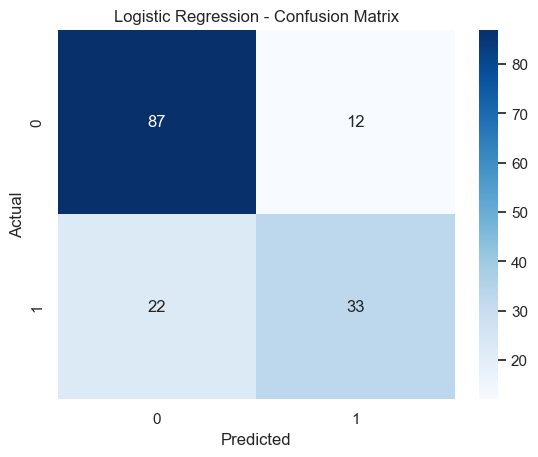

In [58]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### ROC Curve

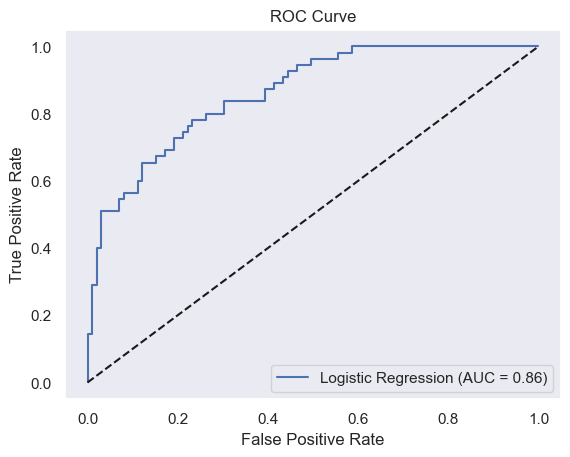

In [61]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

## Decision Tree

In [64]:
# Training
dt = DecisionTreeClassifier(random_state=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=3)

In [66]:
# testing
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]

### Model Evaluation

In [69]:
# basic metrics
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_dt))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Accuracy: 0.7207792207792207
Precision: 0.603448275862069
Recall: 0.6363636363636364
F1 Score: 0.6194690265486726
ROC AUC Score: 0.702020202020202

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78        99
           1       0.60      0.64      0.62        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



## Confusion Matrix

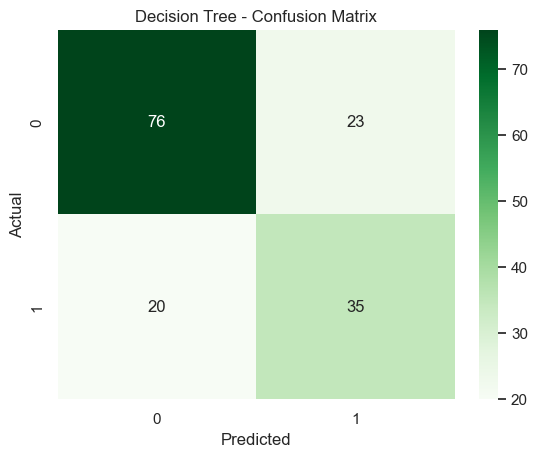

In [72]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
plt.title('Decision Tree - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### ROC Curve

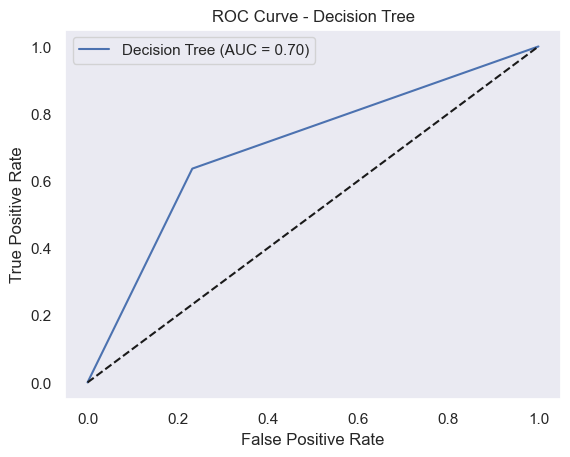

In [75]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_score(y_test, y_prob_dt):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.grid()
plt.show()

## Random Forest

In [78]:
# Training
rf_model = RandomForestClassifier(n_estimators=1000, random_state=3)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=3)

In [80]:
# testing
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

### Model Evaluation

In [83]:
# basic metrics
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_rf))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.7792207792207793
Precision: 0.7142857142857143
Recall: 0.6363636363636364
F1 Score: 0.673076923076923
ROC AUC Score: 0.8608815426997245

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83        99
           1       0.71      0.64      0.67        55

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.75       154
weighted avg       0.78      0.78      0.78       154



### Confusion Matrix

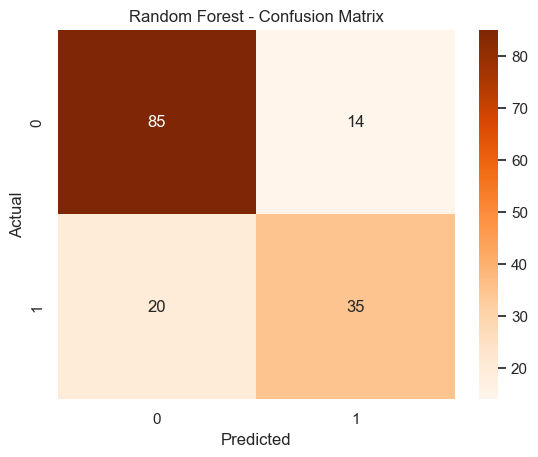

In [86]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges')
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### ROC Curve

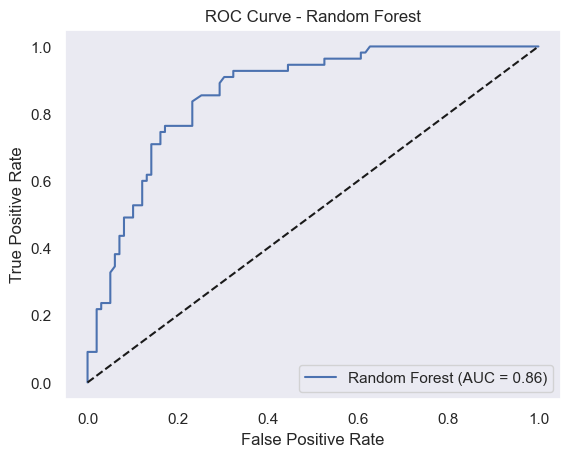

In [89]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.grid()
plt.show()

# Summary Table & Model Selection

In [92]:
summary = {
    "Logistic Regression": {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_prob)
    },
    "Decision Tree": {
        "Accuracy": accuracy_score(y_test, y_pred_dt),
        "Precision": precision_score(y_test, y_pred_dt),
        "Recall": recall_score(y_test, y_pred_dt),
        "F1 Score": f1_score(y_test, y_pred_dt),
        "ROC AUC": roc_auc_score(y_test, y_prob_dt)
    },
    "Random Forest": {
        "Accuracy": accuracy_score(y_test, y_pred_rf),
        "Precision": precision_score(y_test, y_pred_rf),
        "Recall": recall_score(y_test, y_pred_rf),
        "F1 Score": f1_score(y_test, y_pred_rf),
        "ROC AUC": roc_auc_score(y_test, y_prob_rf)
    }
}

summary_df = pd.DataFrame(summary).T.round(4)  # Transpose and round to 3 decimals
print(summary_df)

                     Accuracy  Precision  Recall  F1 Score  ROC AUC
Logistic Regression    0.7792     0.7333  0.6000    0.6600   0.8615
Decision Tree          0.7208     0.6034  0.6364    0.6195   0.7020
Random Forest          0.7792     0.7143  0.6364    0.6731   0.8609


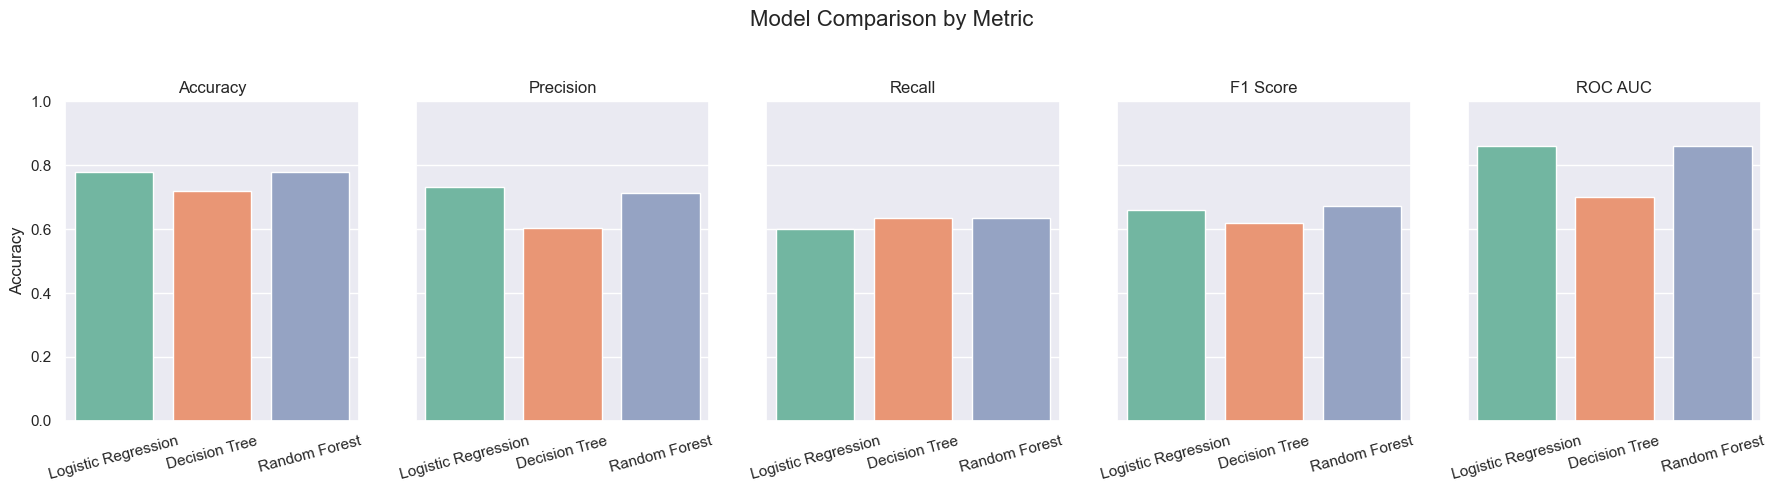

In [94]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
models = summary_df.index.tolist()

# Create a subplot for each metric
fig, axes = plt.subplots(1, len(metrics), figsize=(18, 5), sharey=True)

for i, metric in enumerate(metrics):
    sns.barplot(x=models, y=summary_df[metric], ax=axes[i], palette='Set2')
    axes[i].set_title(metric)
    axes[i].set_ylim(0, 1)
    axes[i].set_xticklabels(models, rotation=15)

plt.suptitle('Model Comparison by Metric', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Save the selected Model

In [ ]:
import pickle

pickle.dump(rf_model, open('model/diabetes_model.pkl', 'wb'))
pickle.dump(scaler, open("model/scaler.pkl", "wb"))